<a href="https://colab.research.google.com/github/dipankarsahu1000/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/dipankarsahu1000

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know The Data***

### Import Libraries

In [252]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

### Dataset Loading

In [253]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
# Load the datasets
path = '/content/drive/MyDrive/Almabetter: Full Stack Data Science/Projects/Exploratory Data Analysis/Play Store App Review Analysis/Datasets/'

# Assigning the dataset contained in the Play Store Data.csv file into the following DataFrame:
ps_df = pd.read_csv(path +'Play Store Data.csv')

# Assigning the dataset contained in the User Reviews.csv file into the following DataFrame:
ur_df = pd.read_csv(path +'User Reviews.csv')


In [255]:
# Defining colors of some output texts:
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"
BOLD = "\033[1m"

### Dataset First View

In [256]:
# First View of the Play Store Data:
print(BOLD + YELLOW + "The first view of the Play Store Data is:" + RESET)
ps_df.head()

The first view of the Play Store Data is:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [257]:
# First View of the User Reviews Data:
print(BOLD + BLUE + "The first view of the Play Store Data is:" + RESET)
ur_df.head()

The first view of the Play Store Data is:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [258]:
# Dataset Rows & Columns count

# First, checking the number of columns and rows in the Play Store Dataset:
row_ps = ps_df.shape[0]
col_ps = ps_df.shape[1]

print(BOLD + YELLOW + f"The Play Store Dataset has {row_ps} rows and {col_ps} columns." + RESET)

The Play Store Dataset has 10841 rows and 13 columns.


In [259]:
# Next, checking the number of columns and rows in the User Reviews Dataset:
row_ur = ur_df.shape[0]
col_ur = ur_df.shape[1]

print(BOLD + BLUE + f"The User Dataset has {row_ur} rows and {col_ur} columns." + RESET)

The User Dataset has 64295 rows and 5 columns.


### Dataset Information

In [260]:
# Play Store Dataset Info
print(BOLD + YELLOW + "The Play Store Dataset Info:" + RESET)
ps_df.info()

The Play Store Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [261]:
# User Review Dataset Info
print(BOLD + BLUE + "The User Reviews Dataset Info:" + RESET)
ur_df.info()

The User Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [262]:
# Dataset Duplicate Value Count for the Play Store Dataset

ps_dup_count = len(ps_df[ps_df.duplicated()])

print(BOLD + YELLOW + f"There are {ps_dup_count} duplicate values in the Play Store Dataset." + RESET)

There are 483 duplicate values in the Play Store Dataset.


In [263]:
# Dataset Duplicate Value Count for the User Reviews Dataset

ur_dup_count = len(ur_df[ur_df.duplicated()])

print(BOLD + BLUE + f"There are {ur_dup_count} duplicate values in the User Reviews Dataset." + RESET)

There are 33616 duplicate values in the User Reviews Dataset.


#### Missing Values/Null Values

In [264]:
# Missing Values/Null Values Count for the Play Store Dataset

ps_null_count = ps_df.isnull().sum().sum()      
# 'sum()' is being used twice because in the first time it will just give the sum of the values under each column in the form of a Series,
# and in the second time it will return the total sum.

print(BOLD + YELLOW + f"There are total {ps_null_count} missing/null values for the Play Store Dataset." + RESET)



There are total 1487 missing/null values for the Play Store Dataset.


In [265]:
# Missing Values/Null Values Count for the User Reviews Dataset

ur_null_count = ur_df.isnull().sum().sum()
print(BOLD + BLUE + f"There are total {ur_null_count} missing/null values for the User Reviews Dataset." + RESET)

There are total 107457 missing/null values for the User Reviews Dataset.


In [266]:
# Checking the missing values per column in the Play Store Dataset
print(BOLD + YELLOW + "The missing values per column in the Play Store Dataset:" + RESET)
ps_df.isnull().sum()

The missing values per column in the Play Store Dataset:


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [267]:
# Checking the missing values per column in the User Reviews Dataset
print(BOLD + BLUE + "The missing values per column in the User Reviews Dataset:" + RESET)
ur_df.isnull().sum()

The missing values per column in the User Reviews Dataset:


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

[None, None]

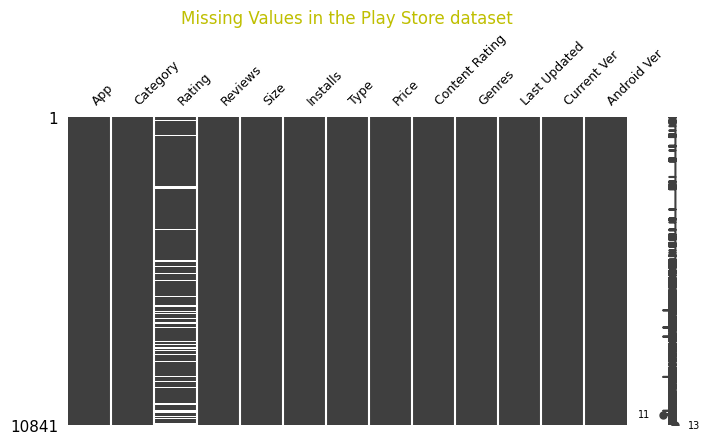

In [268]:
# Visualizing the missing values for the Play Store Dataset
msno.matrix(ps_df, figsize = (8, 4), fontsize = 9)

# missingno (alias: msno) is a library used specially for visualising missing data. Here, msno.matrix() will visualise the missing data in a matrix form.

title_missval_ps = plt.title('Missing Values in the Play Store dataset')
plt.setp(title_missval_ps, color='y')

In the above data matrix of the missing values in the Play Store dataset, it can be said that most of the missing values belong to the 'Rating' column.

[None, None]

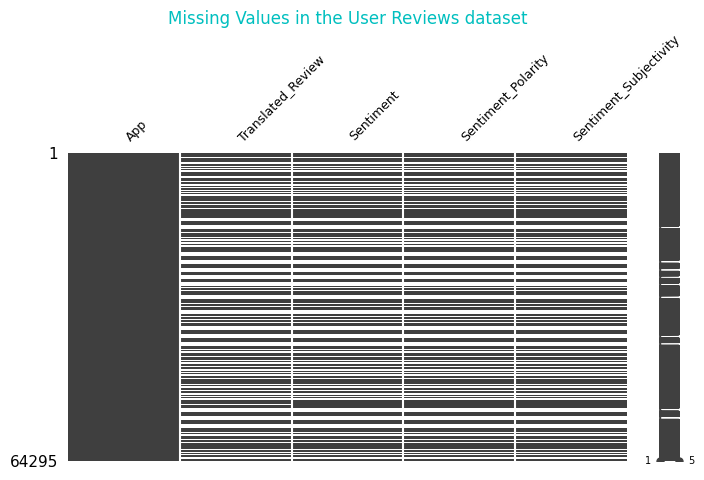

In [269]:
# Visualizing the missing values for the User Reviews Dataset

msno.matrix(ur_df, figsize = (8, 4), fontsize = 9)
title_missval_ur = plt.title('Missing Values in the User Reviews dataset')
plt.setp(title_missval_ur, color= 'c')

In the above data matrix of the missing values in the User Reviews dataset, it can be said that all the columns except the 'App' column contain atleast some missing values.

### What did you know about your dataset?

Answer Here

## ***2. Understanding The Variables***

i. For the Play Store Dataset -

In [270]:
# Play Store Dataset Columns
print(BOLD + YELLOW + "The columns of the Play Store Dataset:" + RESET)
ps_df.columns

The columns of the Play Store Dataset:


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [271]:
# Play Store Dataset Describe
print(BOLD + YELLOW + "The Play Store Dataset is described as:" + RESET)
ps_df.describe()

# The 'Rating' column is the only one column containing numerical values (float64).

The Play Store Dataset is described as:


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


ii. For the User Reviews Dataset -

In [272]:
# User Revies Dataset Columns
print(BOLD + BLUE + "The columns of the User Reviews Dataset:" + RESET)
ur_df.columns

The columns of the User Reviews Dataset:


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [273]:
# User Reviews Dataset Describe
print(BOLD + BLUE + "The User Reviews Dataset is described as:" + RESET)
ur_df.describe()

# The columns 'Sentiment_Polarity' and 'Sentiment_Subjectivity' are the only two columns containing numerical values (float64).

The User Reviews Dataset is described as:


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

<b><font color = 'orange'> 
All the variables in the Play Store Dataset are:
</font></b>

* **App**: The name of the app.
* **Category**: The category to which the app belongs to.
* **Rating**: The ratings (out of 5) given by the users to that particular app.
* **Reviews**: The number of reviews given by the users to that particular app.
* **Size**: The space required in the phone's memory to install that app.
* **Installs**: The number of times that app has been installed by various users.
* **Type**: Tells whether the app is free or paid.
* **Price**: The price of the app if the app is paid, the price would be 0 if it is free.
* **Content Rating**: The Age group for which the app is suitable for.
* **Genres**: The genre(s) of the app.
* **Last Updated**: The date on which the latest update for the app was released.
* **Current Ver**: The current version of the app.
* **Android Ver**: The android version that can support the app.




<b><font color = 'cyan'> 
All the variables in the User Reviews Dataset are:
</font></b>

* **App**: The name of the app.
* **Translated_Review**: The reviews given by the users translated to English.
* **Sentiment**: The sentiment of the users towards that app. It can be Positive, Negative or Neutral.
* **Sentiment_Polarity**: A measure of the sentiment. It has a range of [ -1, 1 ]. The more negative the number is, the more negative is the sentiment and the more positive it is, the more postive is the sentiment. If it is somewhere around 0, then it is a neutral sentiment.
* **Sentiment_Subjectivity**: It defines how subjective are the reviews, or simply, by how much are the sentiments influenced by the personal opinions of the user. It has a range of [ 0, 1]. More closer it is to 0, the more objective (unbiased or free of personal opinions) are the sentiments, and the more closer it is to 1, the more subjective (biased or influenced by personal opinions) are the sentiments.

### Check Unique Values for each variable.

In [274]:
# Check Unique Values for each variable.

def unique_val(df):
  '''
  Returns a DataFrame with only the unique values under each column. 
  
  Note: In this DataFrame of unique values, the values along an individual row are NOT related.
  Under each column, the unique values for that variable are just mentioned. Although the empty cells will be filled up with NaN values, but that can be taken care of later.
  The main aim is to just see the unique values under each column.
  '''
  df_unique = pd.DataFrame()
  for column in df.columns:
    if column == "App" or column == "Translated_Review":
      continue
    df_unique = pd.concat([df_unique, pd.Series(df[column].unique(), name = "Unique_" + column)], axis = 1)
  return df_unique


In [275]:
print(BOLD + YELLOW + "The unique values for each the column in the Play Store dataset:" + RESET)
ps_df_unique = unique_val(ps_df)
ps_df_unique

The unique values for each the column in the Play Store dataset:


,Unique_Category,Unique_Rating,Unique_Reviews,Unique_Size,Unique_Installs,Unique_Type,Unique_Price,Unique_Content Rating,Unique_Genres,Unique_Last Updated,Unique_Current Ver,Unique_Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,AUTO_AND_VEHICLES,3.9,967,14M,"500,000+",Paid,$4.99,Teen,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.2 and up
2,BEAUTY,4.7,87510,8.7M,"5,000,000+",NaN,$3.99,Everyone 10+,Art & Design;Creativity,"August 1, 2018",1.2.4,4.4 and up
3,BOOKS_AND_REFERENCE,4.5,215644,25M,"50,000,000+",0,$6.99,Mature 17+,Art & Design;Action & Adventure,"June 8, 2018",Varies with device,2.3 and up
4,BUSINESS,4.3,167,2.8M,"100,000+",NaN,$1.49,Adults only 18+,Auto & Vehicles,"June 20, 2018",1.1,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
5997,NaN,NaN,885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5998,NaN,NaN,88486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5999,NaN,NaN,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6000,NaN,NaN,1195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
print(BOLD + BLUE + "The unique values for each the column in the User Reviews dataset:" + RESET)
ur_df_unique = unique_val(ur_df)
ur_df_unique

The unique values for each the column in the User Reviews dataset:


,Unique_Sentiment,Unique_Sentiment_Polarity,Unique_Sentiment_Subjectivity
0,Positive,1.000000,0.533333
1,NaN,0.250000,0.288462
2,Neutral,NaN,NaN
3,Negative,0.400000,0.875000
4,NaN,0.600000,0.300000
...,...,...,...
5406,NaN,0.183929,NaN
5407,NaN,0.359167,NaN
5408,NaN,-0.528571,NaN
5409,NaN,-0.377778,NaN


## 3. ***Data Wrangling for the Play Store Dataset***

<b><font color = "orange">
Starting with the Play Store dataset, before moving unto the User Reviews part.</font></b>

### Data Wrangling Code

####i. Taking care of the duplicate values

Earlier, while checking for the duplicate values in the Play Store dataset, it was found that there are 483 duplicate values in the dataset. I will do a bit of checking up on this.

In [277]:
ps_df[ps_df.duplicated()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


Let's pick a random app, say "Google My Business" and then check how many times it appears in the dataset.

In [278]:
ps_df[ps_df["App"] ==  "Google My Business"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up


As it can be seen that for the app named "Google My Business", there are three rows having the exact same values for all the columns.

It is better to remove all the duplicate rows, so that it won't affect any further analysis.

In [279]:
# Dropping all the duplicate rows.
ps_df = ps_df.drop_duplicates("App", keep = "first").reset_index(drop = True)

In [280]:
# Showing off that the Play Store dataset doesn't contain any duplicate values anymore.
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [281]:
# Again checking with our preferred app "Googe My Business", just to show that there is now only one entry for it.
ps_df[ps_df["App"] == "Google My Business"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up


So, now the Play Store dataset contains no duplicate value.

####ii. Taking care of the null values

In the first section of this analysis, I have already taken a look at the null values in the dataset. Now, it is time to dive deeper.

In [282]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are 3 null values in the 'Android Ver' column. Checking out the corresponding rows for which the values under the 'Android Ver' column is null.

In [283]:
ps_df[ps_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The row corresponding to index number 9300 seems to be an irregularity, all of its values are under incorrect columns, so it is better to drop that row.

As for the other two rows, the null values can be replaced with the mode of that feature.

In [284]:
# Dropping the entire row showing irregular characteristic.
ps_df = ps_df.drop(index = 9300).reset_index(drop = True)    

# Calculating the mode value under the "Android Ver" column and replacing the null values for the remaining.
android_ver_mode = ps_df["Android Ver"].mode()[0]
ps_df["Android Ver"] = ps_df["Android Ver"].fillna(android_ver_mode)

In [285]:
# Checking for the remaining rows.
ps_df[(ps_df["App"] == "[substratum] Vacuum: P") | (ps_df["App"] == "Pi Dark [substratum]")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


There are also * null values in the 'Current Ver' column. Checking out the corresponding rows for which the values under the 'Android Ver' column is null.

In [286]:
ps_df[ps_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


Let's just replace the null with the mode value under the 'Current Ver' column.

In [287]:
# Calculating the mode value under the "Current Ver" column and replacing the null values.
current_ver_mode = ps_df["Current Ver"].mode()[0]
ps_df["Current Ver"] = ps_df["Current Ver"].fillna(current_ver_mode)

Now, there is one null value under the 'Type' column and one null value under the 'Content Rating' column.

In [288]:
# Checking the row with the null value under the "Type" column.
ps_df[ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


The above row doesn't seem to be much insightful. So, it is better to just it.

In [289]:
# Dropping that specific row.
ps_df = ps_df.drop(index = ps_df[ps_df["Type"].isnull()].index[0]).reset_index(drop = True)   

In [290]:
# Checking the row with the null value under the "Content Rating" column.
ps_df[ps_df["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no null value for the 'Content Rating' column anymore! Maybe that row got dropped during one of the previous cleaning operations.

In [291]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1462
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

Now, all that remains is the 'Rating' column with a massive number of 1462 null values.

In [292]:
ps_df[ps_df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
9642,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
9648,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
9652,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Before such huge number of datapoints be manipulated, it better check its distribution first.

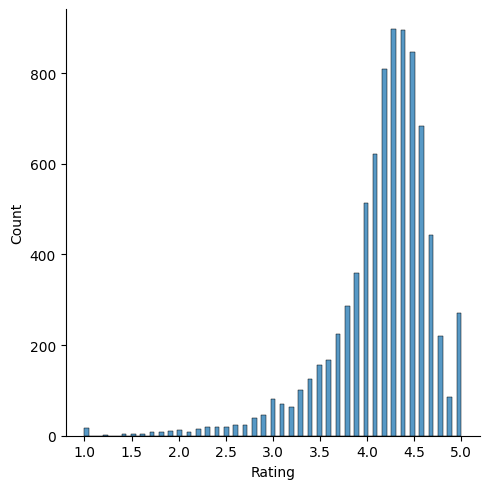

In [305]:
sns.displot(ps_df["Rating"])

It can be seen that the distribution is a bit left-skewed one. So, filling the null values with the mean of the column is out of question.

In [306]:
# Calculating the mode and the median of the "Rating" column.
rating_mode = ps_df["Rating"].mode()[0]
rating_median = ps_df["Rating"].mode()[0]

print(f"Mode: {rating_mode} and Median: {rating_median}")

Mode: 4.3 and Median: 4.3


The mode and the median of the 'Rating' column is same. The null values can be filled with either of them.

In [307]:
# Filling the null values under the "Rating" column with the median value.
ps_df["Rating"] = ps_df["Rating"].fillna(rating_median)

In [308]:
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

So, with that, we have successfully dealt with issue of null values in the dataset!

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***